AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [2]:
import pandas as pd

# Load the Titanic dataset
file_path = 'titanic.csv'
titanic_df = pd.read_csv(file_path)

# Step 3: Get the first 10 rows
first_10_rows = titanic_df.head(10)

# Step 4: Get the last 20 rows
last_20_rows = titanic_df.tail(20)

# Step 5: Print dataset information
print("First 10 rows of the dataset:")
print(first_10_rows)

print("\nLast 20 rows of the dataset:")
print(last_20_rows)

print("\nDataset Information:")
titanic_df.info()

# Step 6: Describe the dataset
print("\nDataset Description:")
print(titanic_df.describe())


First 10 rows of the dataset:
   PassengerId Survived  Pclass  \
0            1        0       3   
1            2        1       1   
2            3        1       3   
3            4        1       1   
4            5        0       3   
5            6        0       3   
6            7        0       1   
7            8        0       3   
8            9        1       3   
9           10        1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Ti

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in the dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


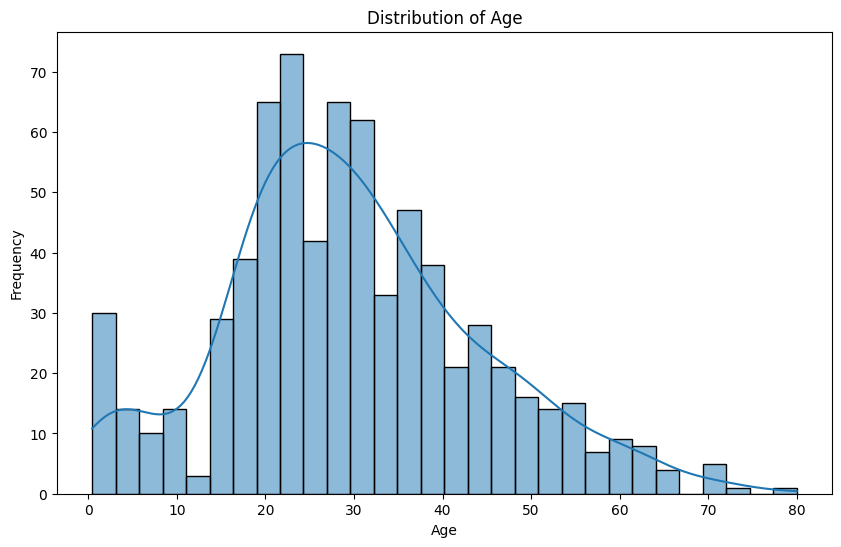


Remaining missing values after handling:
PassengerId    0
Survived       6
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           7
Cabin          0
Embarked       0
dtype: int64


C:\Users\10465\AppData\Local\Temp\ipykernel_15804\3604511978.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)
C:\Users\10465\AppData\Local\Temp\ipykernel_15804\3604511978.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'titanic.csv'  # Update the path if necessary
titanic_df = pd.read_csv(file_path)

# Step 1: Find missing values in the dataset
missing_values = titanic_df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Step 2.1: Plot the 'Age' column to study its nature
plt.figure(figsize=(10,6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 2.2: Based on the plot (right-skewed), we will use the median as the best measure of central tendency
median_age = titanic_df['Age'].median()

# Step 2.3: Fill missing values in the 'Age' column using the median
titanic_df['Age'].fillna(median_age, inplace=True)

# Step 3: Handle missing values in the 'Cabin' column
# Since 'Cabin' has many missing values, we will fill with 'Unknown'
titanic_df['Cabin'].fillna('Unknown', inplace=True)

# Step 4: Handle missing values in the 'Embarked' column
# There are only 2 missing values, so we fill them with the most frequent value (mode)
most_frequent_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Step 5: Handle incorrect data in 'Survived' column
# Ensure 'Survived' column has only binary values (0 and 1)
titanic_df['Survived'] = titanic_df['Survived'].apply(lambda x: 1 if x == '1' else 0 if x == '0' else None)

# Step 6: Handle incorrectly formatted data in the 'Fare' column
# Convert 'Fare' to numeric and coerce errors
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

# Recheck for missing values after handling the issues
remaining_missing_values = titanic_df.isnull().sum()
print("\nRemaining missing values after handling:")
print(remaining_missing_values)

# At this point, 'Survived' and 'Fare' columns still have some missing values that need to be addressed.


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

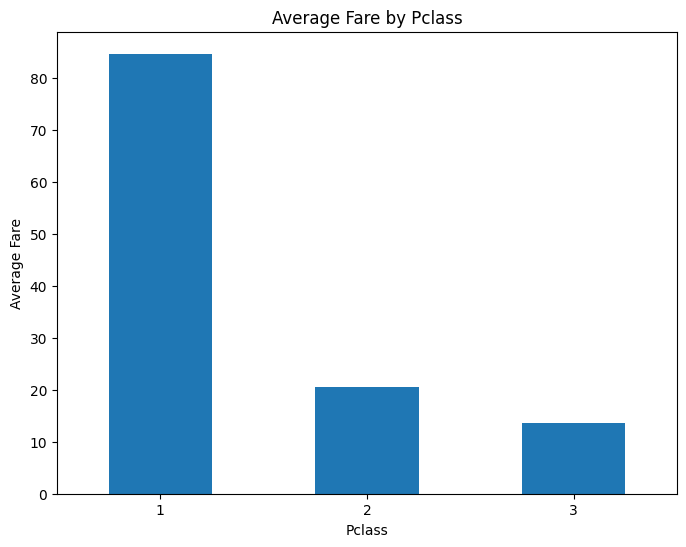

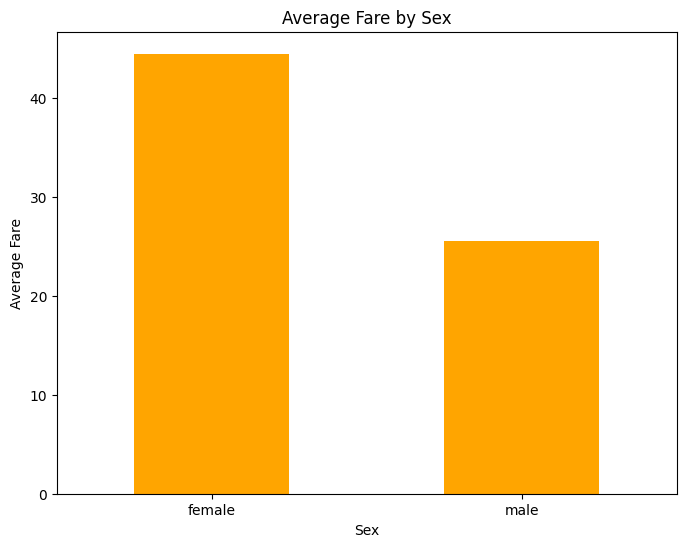

Average Fare by Pclass:
Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64

Average Fare by Sex:
Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = 'titanic.csv'  # Adjust the file path if necessary
titanic_df = pd.read_csv(file_path)

# Ensure 'Fare' is numeric (if needed, otherwise skip this)
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

# Step 1: Find the average fare grouped by Pclass
avg_fare_by_pclass = titanic_df.groupby('Pclass')['Fare'].mean()

# Step 1.1: Plot the average fare by Pclass
plt.figure(figsize=(8,6))
avg_fare_by_pclass.plot(kind='bar')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

# Step 2: Find the average fare grouped by Sex
avg_fare_by_sex = titanic_df.groupby('Sex')['Fare'].mean()

# Step 2.1: Plot the average fare by Sex
plt.figure(figsize=(8,6))
avg_fare_by_sex.plot(kind='bar', color='orange')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

# Display results for reference
print("Average Fare by Pclass:")
print(avg_fare_by_pclass)

print("\nAverage Fare by Sex:")
print(avg_fare_by_sex)



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

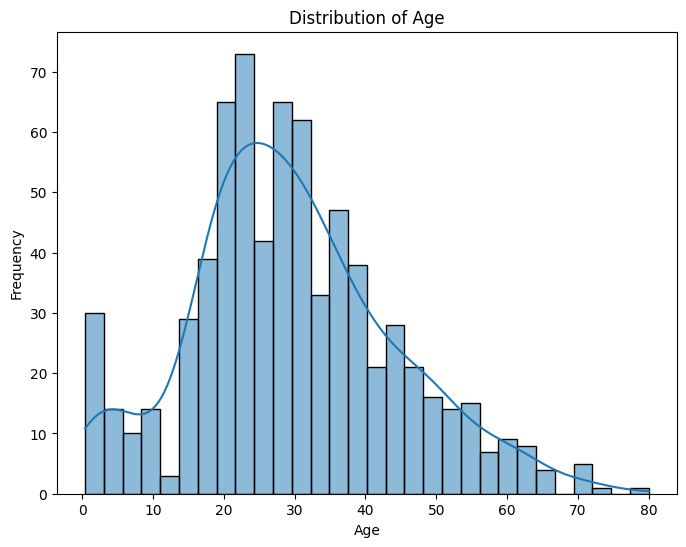

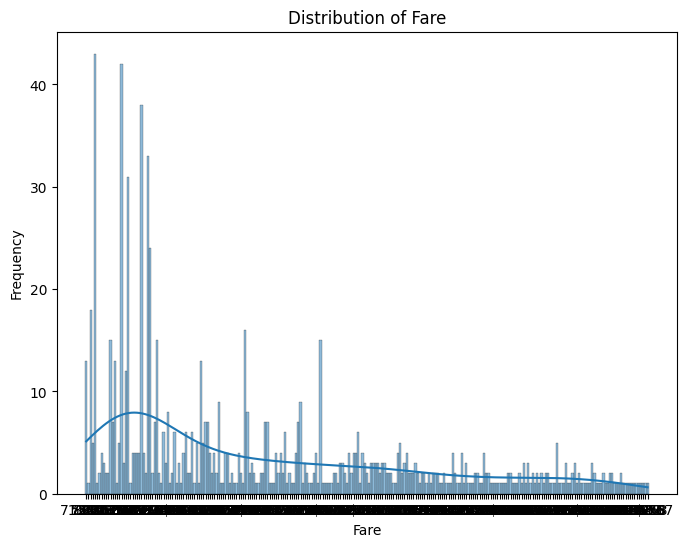

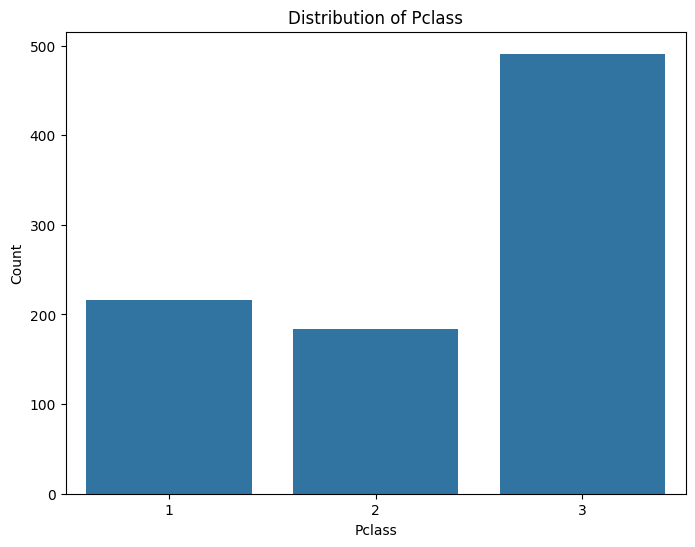

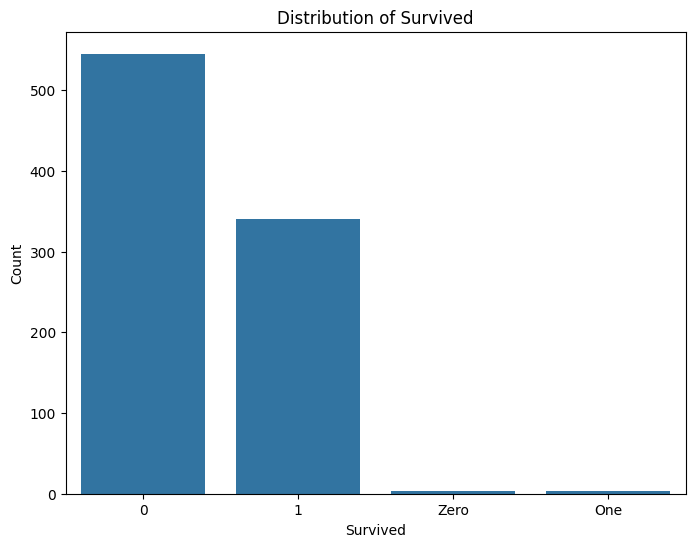

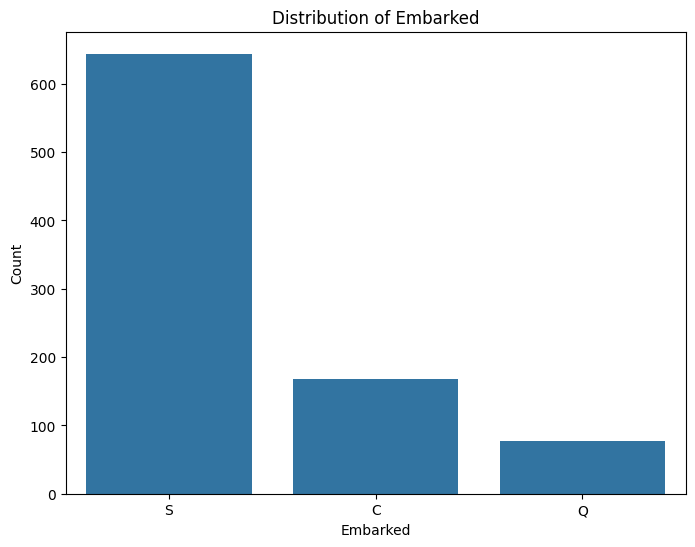

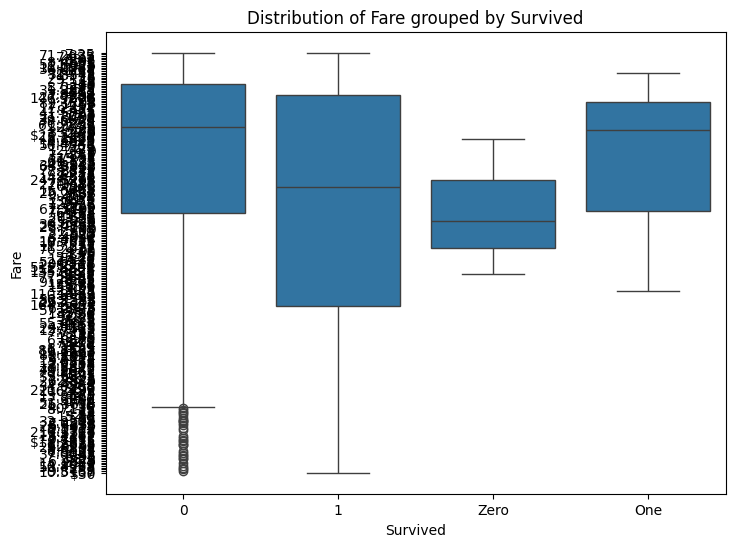

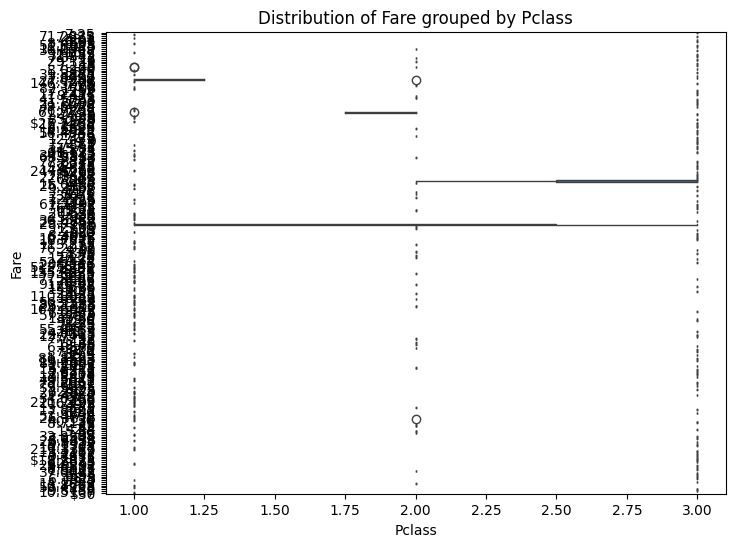

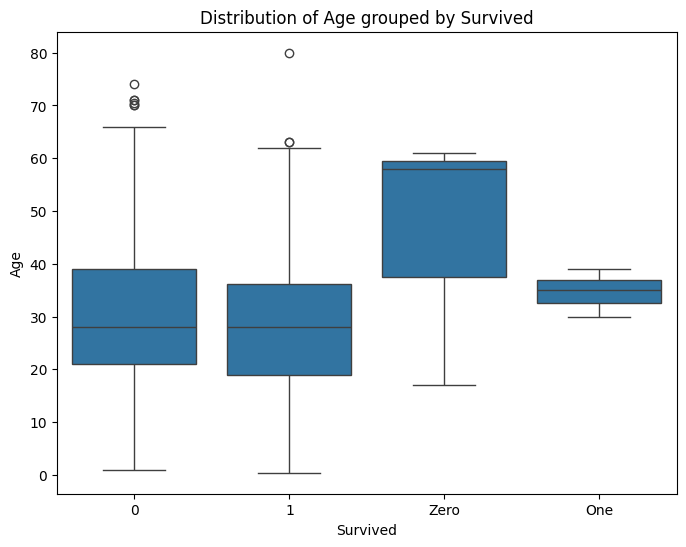

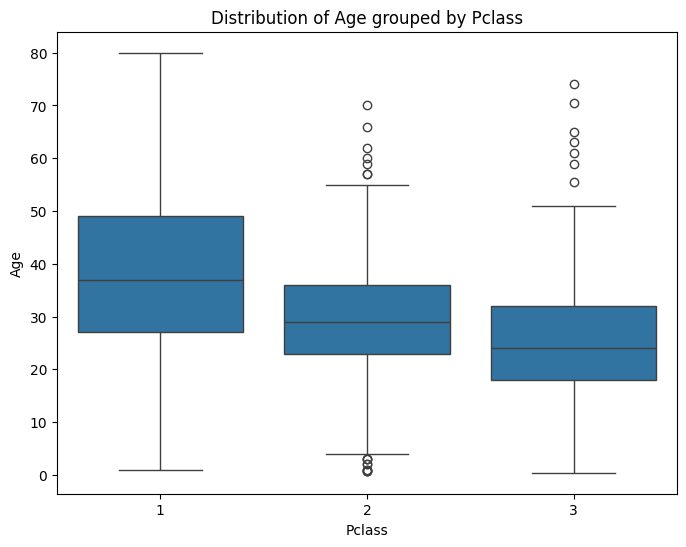

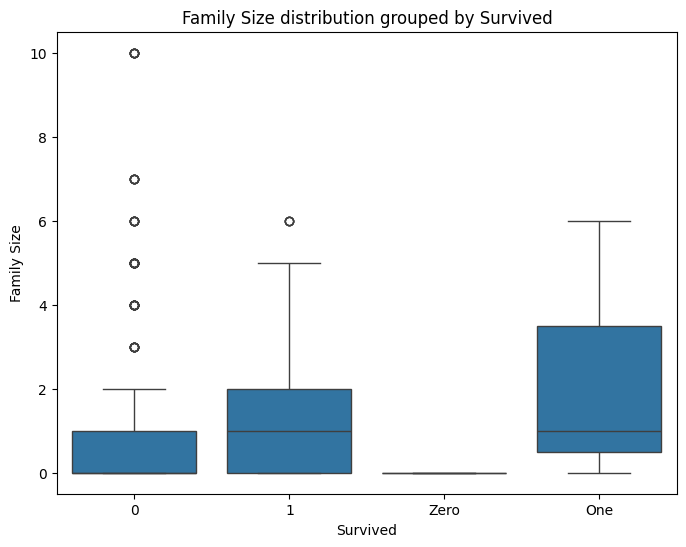

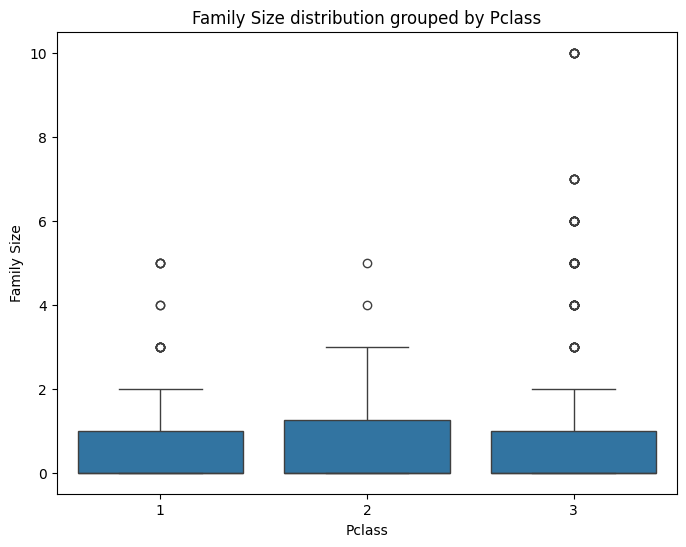

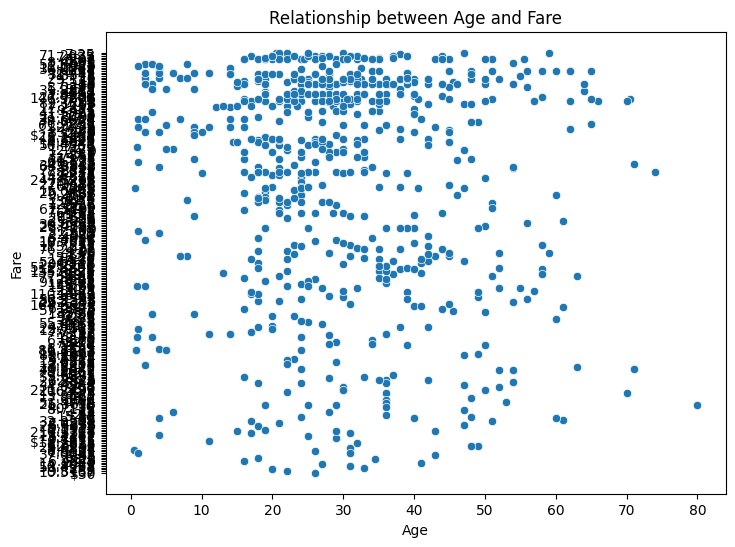

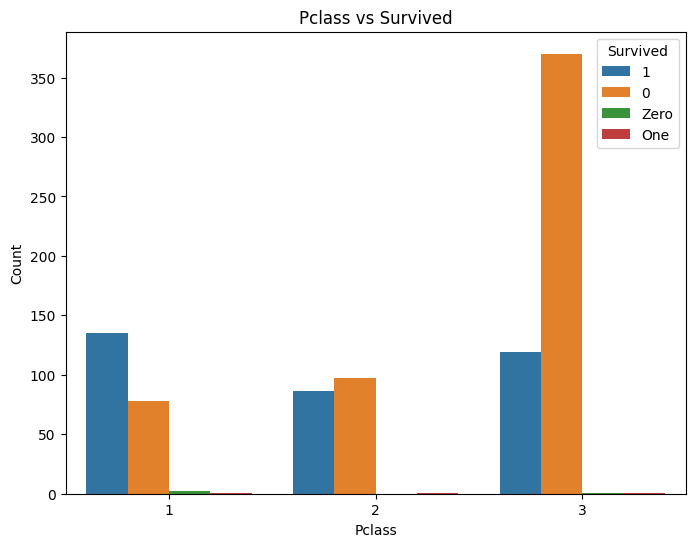

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'titanic.csv'  # Adjust the file path if necessary
titanic_df = pd.read_csv(file_path)

# Step 1: Plot the distribution of 'Age'
plt.figure(figsize=(8,6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Step 2: Plot the distribution of 'Fare'
plt.figure(figsize=(8,6))
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Step 3: Plot the distribution of 'Pclass'
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Step 4: Plot the distribution of 'Survived'
plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Step 5: Plot the distribution of 'Embarked'
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Step 6: Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Distribution of Fare grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

# Step 7: Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Distribution of Fare grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Step 8: Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Distribution of Age grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Step 9: Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Distribution of Age grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Step 10: Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='FamilySize', data=titanic_df)
plt.title('Family Size distribution grouped by Survived')
plt.xlabel('Survived')
plt.ylabel('Family Size')
plt.show()

# Step 11: Combine 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='FamilySize', data=titanic_df)
plt.title('Family Size distribution grouped by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Family Size')
plt.show()

# Step 12: Plot the relationship between 'Age' and 'Fare'
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Step 13: Other possible relationships to explore:
# - Relationship between 'Pclass' and 'Survived'
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Pclass vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

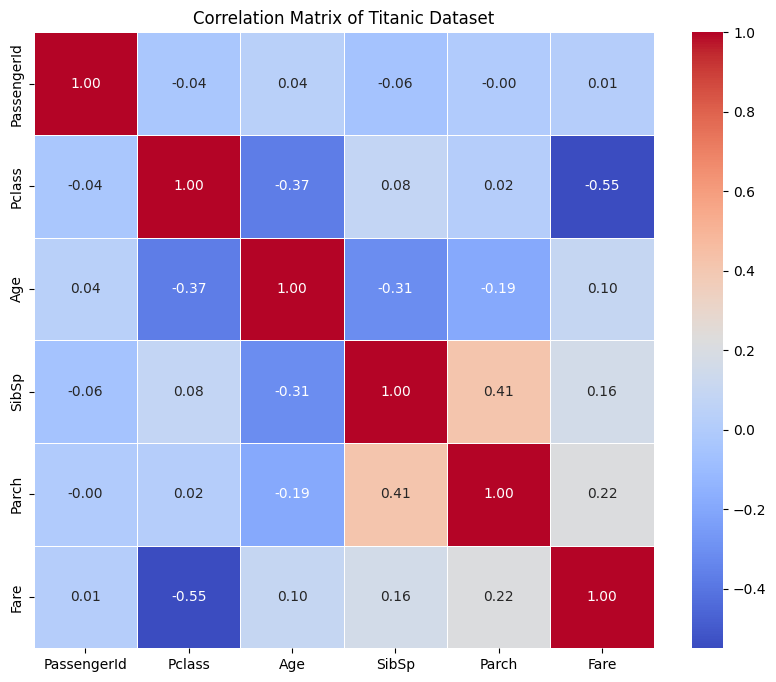

Correlation between 'Age' and 'Fare': 0.10

Correlation Matrix:
             PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144  0.036847 -0.057527 -0.001652  0.013500
Pclass         -0.035144  1.000000 -0.369226  0.083081  0.018443 -0.550122
Age             0.036847 -0.369226  1.000000 -0.308247 -0.189119  0.096511
SibSp          -0.057527  0.083081 -0.308247  1.000000  0.414838  0.159746
Parch          -0.001652  0.018443 -0.189119  0.414838  1.000000  0.216417
Fare            0.013500 -0.550122  0.096511  0.159746  0.216417  1.000000


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
file_path = 'titanic.csv'  # Adjust the file path if necessary
titanic_df = pd.read_csv(file_path)

# Ensure 'Fare' is in numeric format by coercing errors (convert invalid values to NaN)
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

# Step 1: Generate a correlation matrix for the entire dataset
correlation_matrix = titanic_df.corr(numeric_only=True)

# Plot the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

# Step 2: Find the correlation between 'Age' and 'Fare'
age_fare_correlation = titanic_df['Age'].corr(titanic_df['Fare'])
print(f"Correlation between 'Age' and 'Fare': {age_fare_correlation:.2f}")

# Step 3: Explore other possible correlations by reviewing the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

